In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [4]:
len(data)

13871

In [5]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [6]:
sample_data = data['text'][:1000]

In [7]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [8]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [9]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [ 0.00438352 -0.06997187  0.12097137  0.14664769 -0.06645499 -0.09574528
  0.05433995  0.20012493 -0.2053167   0.1396936   0.14670274 -0.11339499
  0.10044324 -0.01624791  0.15571085  0.24790634  0.30072775 -0.07323141
 -0.21964289 -0.2859862 ]
[('476', 0.8480947017669678), ('931', 0.7694255113601685), ('823', 0.7573289275169373), ('629', 0.7566874027252197), ('294', 0.7374776601791382), ('854', 0.7335252165794373), ('588', 0.6952683329582214), ('115', 0.688560962677002), ('614', 0.6870896220207214), ('175', 0.6698516607284546)]
[-1.1031214 -0.3088549  1.7857615  5.332283   2.8409655  1.8192695
 -3.0525866  0.6074105  1.9624678  4.1651816  4.1532817 -4.1484647
 -2.0976112  1.0643601  4.15989   -3.8735318  7.744615  -1.3950467
 -5.1323404 -5.5368285]


In [10]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [11]:
list(doc_vectors.values())[1]

array([ 0.06330448, -0.21788867,  0.3508768 ,  0.17774434, -0.0566807 ,
       -0.0211945 ,  0.17575681,  0.3887645 , -0.19505577,  0.20557337,
        0.24518056, -0.13288654,  0.24782242, -0.10664132,  0.31781647,
        0.23959166,  0.6224292 , -0.14572848, -0.365514  , -0.46876875],
      dtype=float32)

In [12]:
#perform k-means clustering on embedded documents

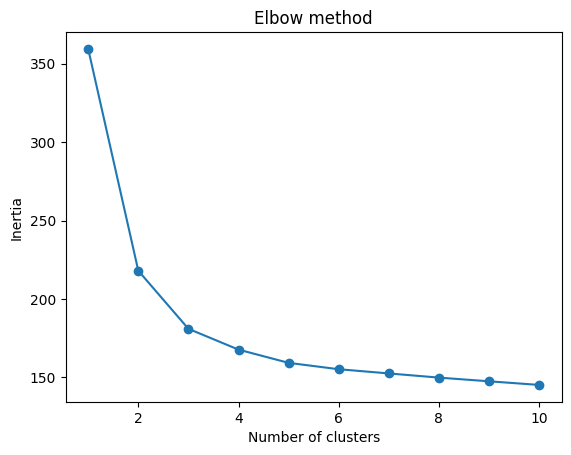

In [13]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [79]:
num_clusters = 3

In [80]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [16]:
#find centroids. compute bigram closest to centroid

In [81]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.01190199, -0.12248473,  0.43582872,  0.25006284, -0.24285619,
        -0.2027092 ,  0.29370003,  0.51867168, -0.52353539,  0.17704071,
         0.40229178, -0.20181073,  0.42585084,  0.05580942,  0.41993606,
         0.358582  ,  0.78581129, -0.20488119, -0.44728446, -0.65180724],
       [ 0.0112914 , -0.07896771,  0.29676424,  0.16086322, -0.16461737,
        -0.13183839,  0.1953516 ,  0.34909027, -0.35107156,  0.11879044,
         0.26708631, -0.13266125,  0.29098554,  0.03661809,  0.28424857,
         0.25300887,  0.53851336, -0.14522125, -0.30988377, -0.43464792],
       [-0.00177255, -0.03810487,  0.15985724,  0.08863173, -0.08779525,
        -0.06035203,  0.10502748,  0.17872682, -0.17768213,  0.06599665,
         0.14512952, -0.07216945,  0.15795976,  0.01078512,  0.14538747,
         0.14388322,  0.28991326, -0.07540852, -0.16192876, -0.23267001]])

In [82]:
#build vocabulary
vocab = []
for doc in sample_data:
    vocab += word_tokenize(doc.lower())
vocab = list(set(vocab))

In [83]:
#a selection of poliical words 
political_keywords = [
    "democracy", "republic", "monarchy", "constitution", "senate", "parliament",
    "legislature", "bill", "law", "amendment", "veto", "executive", "judiciary",
    "congress", "cabinet", "prime", "president", "governor", "mayor", "election",
    "ballot", "referendum", "campaign", "lobby", "politician", "party", "coalition",
    "majority", "minority", "opposition", "incumbent", "candidate", "policy", "platform",
    "ideology", "socialism", "capitalism", "communism", "fascism", "nationalism",
    "populism", "liberalism", "conservatism", "progressivism", "federalism", "state",
    "municipality", "autonomy", "centralization", "devolution", "impeachment", "coup",
    "revolution", "sanction", "diplomacy", "treaty", "alliance", "sovereignty", "bureaucracy",
    "civil", "liberty", "freedom", "justice", "equality", "taxation", "welfare", "healthcare",
    "education", "defense", "security", "immigration", "trade", "tariff", "budget", "deficit",
    "debt", "regulation", "deregulation", "policy", "interest", "NGO", "PAC", "grassroots",
    "superpower", "diplomacy", "NATO", "UN", "electoral", "gerrymandering", "filibuster",
    "constituent", "suffrage", "pluralism", "bipartisanship", "caucus", "midterms",
    "progressive", "liberal", "conservative", "leftist", "right-wing", "vote", "redistricting"
]

In [84]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [85]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [86]:
list(bigram_vecs.values())[0]

array([-0.03972526,  0.0266095 , -0.02555733, -0.00016615,  0.02217252,
       -0.01769617,  0.01327935,  0.01167592, -0.04666952, -0.0140603 ,
        0.00773233, -0.08259363,  0.04072887, -0.06797408, -0.0228213 ,
        0.00181977,  0.05350007,  0.02688594, -0.04726947,  0.02413638],
      dtype=float32)

In [87]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [88]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [89]:
nearest_bigram_to_centroid

[('conservatism debt', -0.7831622248014147),
 ('conservatism debt', -0.7811045478359165),
 ('conservatism debt', -0.7822733145445798)]

In [1]:
#method 2) use TF-IDF, or do a frequency count of top two most common words in cluster
#method 3) use word embeddings to compute distance from word to list of words, take closest words

In [27]:
labeled_data = zip(sample_data,kmeans.labels_)

In [28]:
#build vocabulary
cluster_vocab = [[] for centroid in centroids]
for doc, label in list(labeled_data):
    cluster_vocab[label] += word_tokenize(doc.lower())
cluster_vocab = [list(set(vocab)) for vocab in cluster_vocab]

In [38]:
len(cluster_vocab[2])

2471

In [30]:
from collections import Counter
cluster_counts = Counter(cluster_vocab[0])

In [8]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [17]:
str([float(a) for a in nlp("hello").vector])

'[2.2407000064849854, 1.0389000177383423, 1.3092000484466553, -1.7335000038146973, -0.7846599817276001, -0.2926900088787079, -1.805899977684021, -2.5223000049591064, 0.7802500128746033, 2.4899001121520996, -0.09184899926185608, 0.2875500023365021, -1.5056999921798706, 2.633699893951416, 2.5251998901367188, -0.22431999444961548, -2.2067999839782715, -0.5789499878883362, -0.5655099749565125, -1.9337999820709229, 1.4973000288009644, 0.8588899970054626, 3.3559000492095947, -3.752700090408325, 0.22585000097751617, -0.16968999803066254, 0.5138900279998779, 0.4607299864292145, -0.28248000144958496, -2.60479998588562, -3.589600086212158, -1.097100019454956, -1.5516999959945679, -0.12184999883174896, 2.863300085067749, -1.252500057220459, -1.6923999786376953, -2.2916998863220215, 0.9779300093650818, 0.469539999961853, -3.5950000286102295, -0.17357000708580017, 0.9804999828338623, -1.8043999671936035, -0.7218300104141235, -0.4070900082588196, -3.0943000316619873, 0.13095000386238098, -2.90149998

In [35]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [44]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).similarity(nlp(word)) for word in wordset])

In [45]:
dist_to_wordset(political_words[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_13597/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.263570855730982

In [46]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [52]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_13597/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)